## Breast Cancer Prediction

Breast Cancer Prediction ha come obiettivo quello di creare un classificatore che può aiutare a diagnosticare i pazienti e prevedere la probabilità che un cancro al seno sia benigno o maligno.

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



leggo il dataset

In [156]:
df = pd.read_csv('data.csv')
df.sample(50)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
416,905978,B,9.405,21.70,59.60,271.2,0.10440,0.06159,0.020470,0.012570,...,31.24,68.73,359.4,0.15260,0.11930,0.06141,0.03770,0.2872,0.08304,NaN
97,862261,B,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,26.29,68.81,366.1,0.13160,0.09473,0.02049,0.02381,0.1934,0.08988,NaN
457,9112367,B,13.210,25.25,84.10,537.9,0.08791,0.05205,0.027720,0.020680,...,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788,NaN
355,9010258,B,12.560,19.07,81.92,485.8,0.08760,0.10380,0.103000,0.043910,...,22.43,89.02,547.4,0.10960,0.20020,0.23880,0.09265,0.2121,0.07188,NaN
563,926125,M,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.317400,0.147400,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,NaN
60,858970,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.010840,0.012900,...,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,NaN
15,84799002,M,14.540,27.54,96.73,658.8,0.11390,0.15950,0.163900,0.073640,...,37.13,124.10,943.2,0.16780,0.65770,0.70260,0.17120,0.4218,0.13410,NaN
87,86135502,M,19.020,24.59,122.00,1076.0,0.09029,0.12060,0.146800,0.082710,...,30.41,152.90,1623.0,0.12490,0.32060,0.57550,0.19560,0.3956,0.09288,NaN
325,89511502,B,12.670,17.30,81.25,489.9,0.10280,0.07664,0.031930,0.021070,...,21.10,88.70,574.4,0.13840,0.12120,0.10200,0.05602,0.2688,0.06888,NaN
555,924934,B,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.027380,...,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283,NaN


numero righe e colonne del dataset

In [157]:
df.shape

(569, 33)

## Data Cleaning (rimozione valori nulli, duplicati)

stampo le info del dataset per fare una panoramica

In [158]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

controlliamo se ci sono valori nulli.

In [159]:
# Identifica le colonne con almeno un valore nullo
colonne_con_valori_nulli = df.columns[df.isnull().any()].tolist()

# Stampa le colonne con valori nulli
print("Colonne con valori nulli:")
print(colonne_con_valori_nulli)


Colonne con valori nulli:
['Unnamed: 32']


eliminiamo la colonna 32

In [160]:
df.drop(columns=['Unnamed: 32'], inplace=True)
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

La prima cosa da fare è di enumerare la colonna di diagnosi tale che M = 1, B = 0. In questo modo possono essere usati come input per algoritmi di ml.

In [161]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


controllo se sono presenti valori nulli.

In [162]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

non ci sono valori nulli, verifico se ci sono duplicati.

In [163]:
df.duplicated().sum()

0

non ci sono duplicati.

## Data Undestanding

fase in cui i dati vengono esplorati, visualizzati e compresi per scoprire informazioni rilvenanti ,tendenze, relazioni e anomalie nei dati.

In [164]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

quindi il mio dataset ha 357 cellule maligne e 212 benigne.

vado a rappresentare tali informazioni usando un grafico a torta

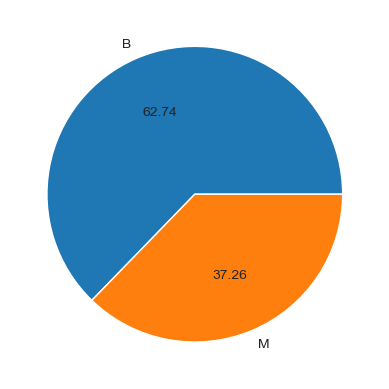

In [165]:
plt.pie(df['diagnosis'].value_counts(), labels=['B', 'M'], autopct="%0.2f")
plt.show()

Ora stampo un grafico riassuntivo, un pairplot. In un pairplot, in cui vengono confrontate alcune variabili numeriche presentei nel dataset  con le altre variabili numeriche tramite grafici a dispersione, quindi consentono di visualizzare e individuare eventuali relazioni o tendenze tra le variabili.

C:\Users\Utente\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


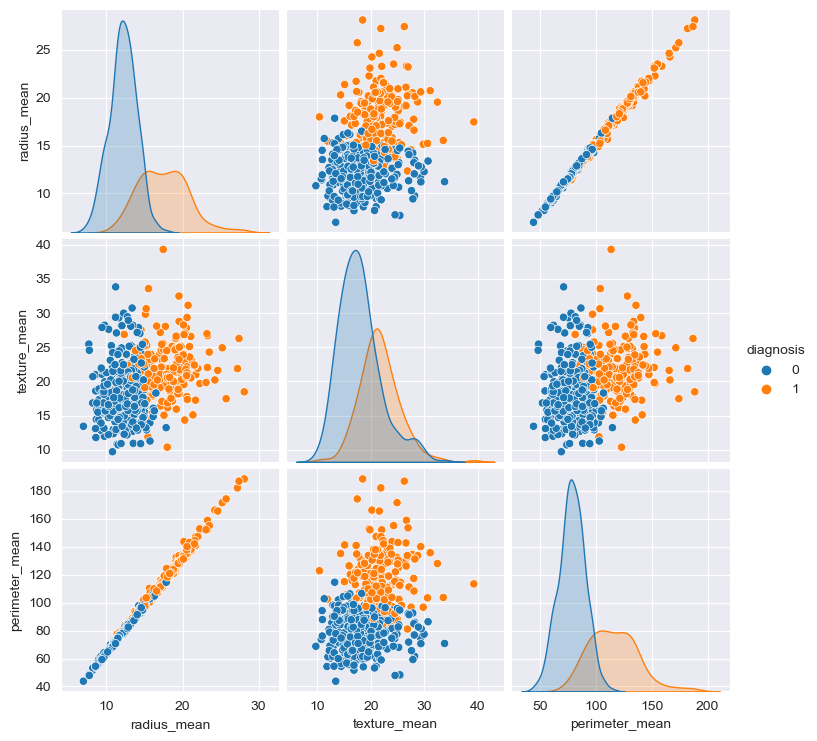

In [166]:
sns.pairplot(df.iloc[:,1:5],hue="diagnosis")

emerge dal pairplot:
    - radius_mean(media delle distanze dal centro ai punti sul perimetro) benigni sono di piu rispetto ai maligni
    -texture_mean benigne sono di piu rispetto ai  maligni
    -perimeter_mean benigni sono di piu rispetto ai maligni

## Data preparation(Feature scaling) 

In [167]:
#split the dataset into dependent(X) and independent(Y) dataset
X=df.iloc[:, 2:31].values
Y=df.iloc[:,1].values

Y=Y.astype('int')
# altra modalità per definire il set di Y e  
# variazione con definizione di y e x 
#features_mean = list(df.columns[2:31])
#X = df.loc[:,features_mean] 
#Y = df.loc[:, ['diagnosis']]


In [168]:
#splitting the data into training and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
#da eliminare
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])


The number of records in the training dataset is 398
The number of records in the test dataset is 171


Utilizzo StandardScaler che fa parte della libreria scikit-learn e rappresenta un oggetto utilizzato per la standardizzazione dei dati. La standardizzazione è una tecnica di feature scaling che trasforma le feature in modo che abbiano una media zero e una deviazione standard unitaria.

In [169]:
#Feature Scaling iniziale
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
# Apportato modifica
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Data preparation(Feature Selection)

feature selection with correlation:
 - Vado a visualizzare gli stessi dati con la matrice di correlazione, che mi restituisce le correlazioni tra le variabili del dataset.

In [170]:
df.iloc[:,1:32].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


vado a rappresentare tali valori con una heatmap che utilizza colori per visualizzare i valori dei coefficienti di correlazione tra le diverse coppie di variabili nel dataset, consentendo di individuare facilmente relazioni tra di esse.
All'interno della mappa:
- Le celle più scure o più chiare indicano correlazioni più forti o più deboli, rispettivamente. 
- le variabili che sono fortemente correlate tra loro (valori vicini a 1 o -1) o variabili che hanno una bassa correlazione (valori vicini a 0).

<Axes: >

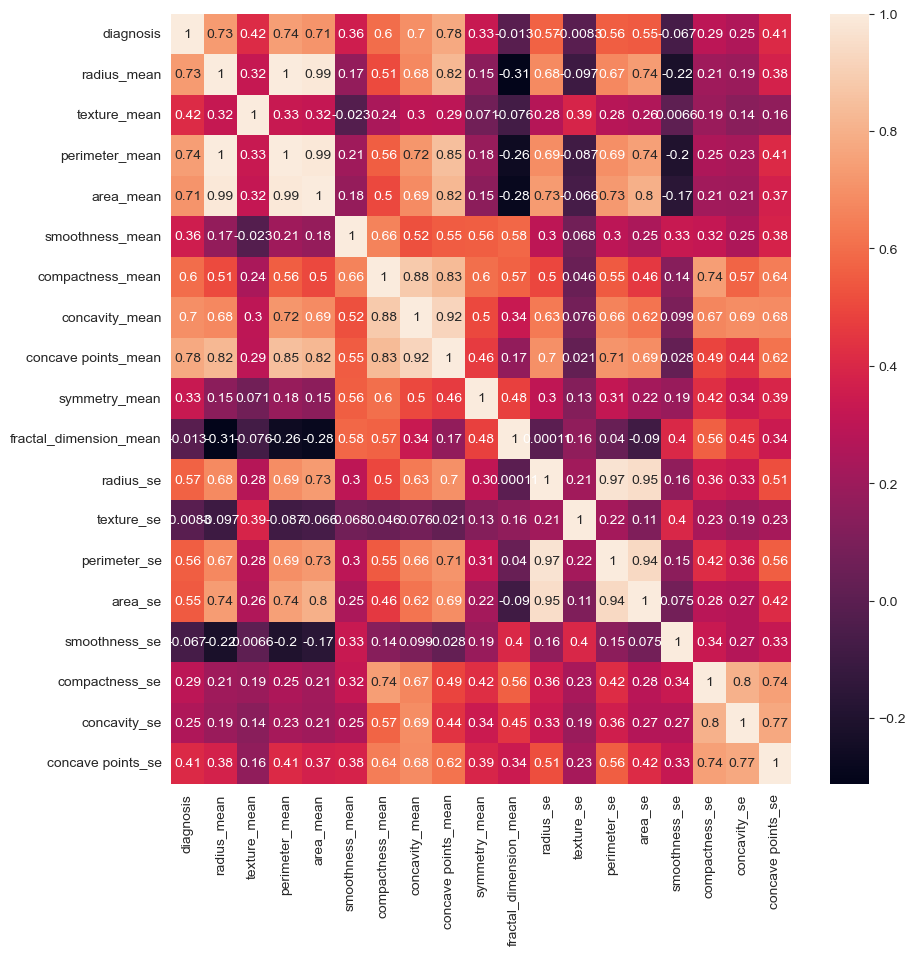

In [171]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:20].corr(), annot=True)


Dalla heatmap emergono svariate considerazioni facilemente spiegabili ad esempio:
- forte correlazione tra area_mean, radius_mean e perimeter_mean
- forte correlazione tra Compactness_mean, concavity_mean e concave points_mean 

eliminiamo le colonne correlate

In [172]:
#eliminiamo le colonne correlate
columns_to_drop = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']

# Utilizza il metodo drop per eliminare le colonne specificate
df = df.drop(columns=columns_to_drop, axis=1) #axis=1 vuol dire colonne, axis=0 righe
print(df.head())


         id diagnosis  texture_mean  area_mean  smoothness_mean  \
0    842302         1         10.38     1001.0          0.11840   
1    842517         1         17.77     1326.0          0.08474   
2  84300903         1         21.25     1203.0          0.10960   
3  84348301         1         20.38      386.1          0.14250   
4  84358402         1         14.34     1297.0          0.10030   

   concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  area_se  \
0          0.3001         0.2419                 0.07871      0.9053   153.40   
1          0.0869         0.1812                 0.05667      0.7339    74.08   
2          0.1974         0.2069                 0.05999      0.7869    94.03   
3          0.2414         0.2597                 0.09744      1.1560    27.23   
4          0.1980         0.1809                 0.05883      0.7813    94.44   

   smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
0       0.006399       0.05373      0.030

Dopo aver eliminato le features correlate possiamo visualizzare nuovamente la matrice di correlazione

<Axes: >

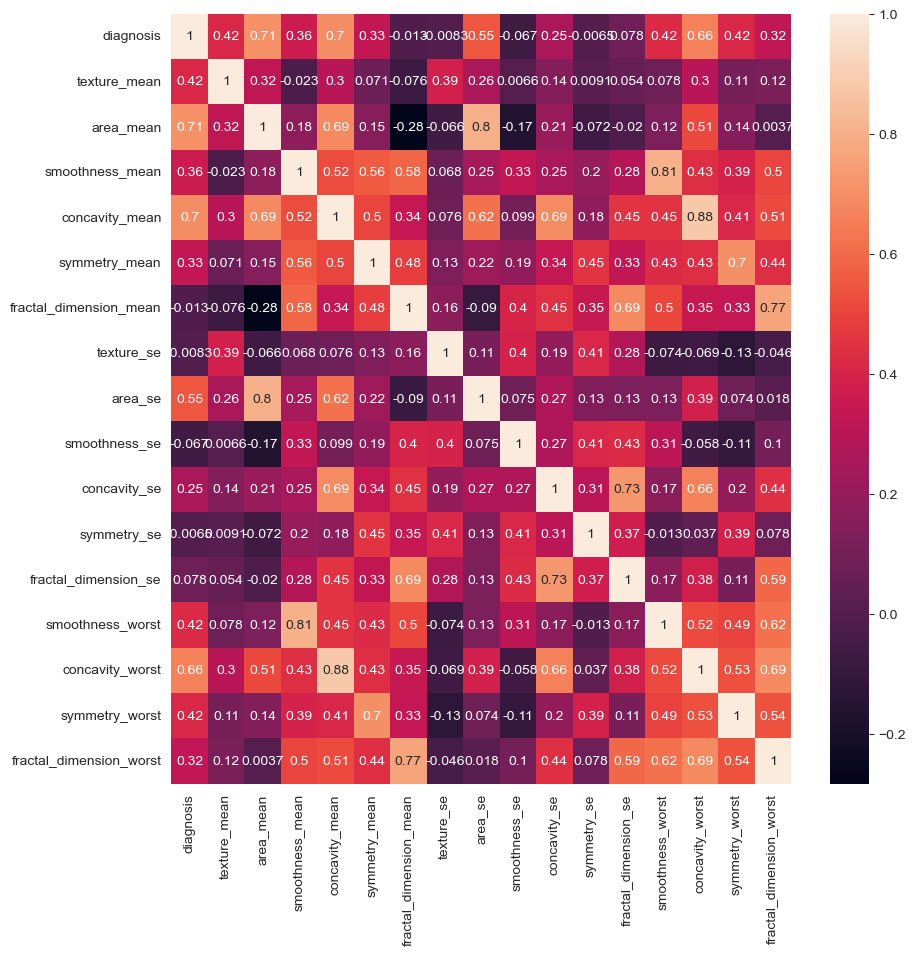

In [173]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:20].corr(), annot=True)

## Data Preparation(Data Balancing)

Ho un dataset sbilanciato. Quindi le tecniche che posso applicare sono 2: Undersampling o Oversampling. Quindi siccome il mio dataset e fortemente sbilanciato con una presenza maggiore di istanze della classe benigna.
Eliminare istanze della classe benigna 
Aumentare istanze della classe maligna.

In [174]:

# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
# Creating the modeling dataset
from sklearn.datasets import make_classification


In [175]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
encoded_train_Y = lab_enc.fit_transform(Y_train)


# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)


X_train_rus, y_train_rus= rus.fit_resample(X_train, encoded_train_Y)
# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

[(0, 149), (1, 149)]


vediamo che ha bilanciato correttamente

## Modeling

adesso il mio dataset e bilanciato e posso procedere con la fase di modeling

In [176]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score

In [177]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [178]:
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
#Y=Y.astype('int')
mnb.fit(X_train,Y_train)


The number of records in the training dataset is 398
The number of records in the test dataset is 171


MultinomialNB()

facciamo mnb

Accuracy:  0.8362573099415205
Precision:  0.972972972972973
Recall:  0.5714285714285714


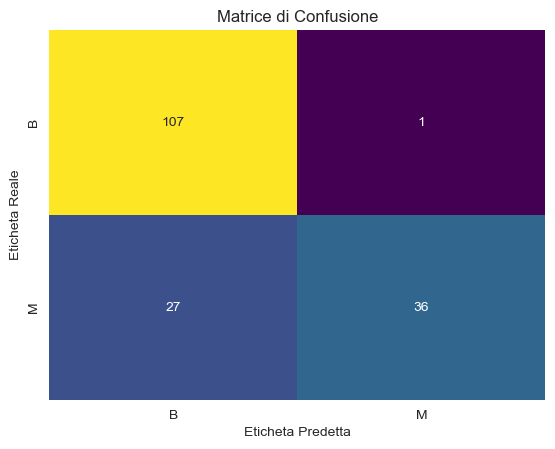

In [179]:
#procedo ad addestrare il modello sui dati di training

mnb.fit(X_train,Y_train)

#predizioni 
y_pred = mnb.predict(X_test)
#metriche
accuracyMNB = accuracy_score(Y_test,y_pred)
precisionMNB = precision_score(Y_test,y_pred)
recallMNB = recall_score(Y_test, y_pred)
#stampo metriche
print('Accuracy: ' ,accuracyMNB)
print('Precision: ' ,precisionMNB)
print('Recall: ' ,recallMNB)

#plot della matrice di confusione
labels=['B', 'M']
confusion_matrix_result = confusion_matrix(Y_test, y_pred)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels, cbar=False)
plt.title('Matrice di Confusione')
plt.xlabel('Eticheta Predetta')
plt.ylabel('Eticheta Reale')
plt.show()



Naive Bayes GNB (Gaussian)

Accuracy:  0.935672514619883
Precision:  0.9193548387096774
Recall:  0.9047619047619048


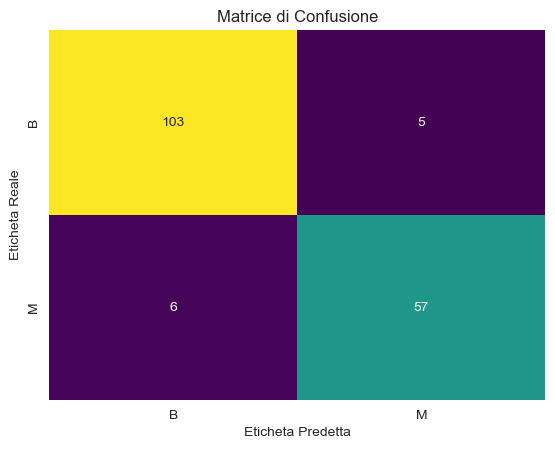

In [180]:
gnb.fit(X_train,Y_train) #training 
y_pred1 = gnb.predict(X_test) #testing
accuracyGNB = accuracy_score(Y_test,y_pred1)
precisionGNB = precision_score(Y_test,y_pred1)
recallGNB = recall_score(Y_test,y_pred1)
print('Accuracy: ' , accuracyGNB)
print('Precision: ' , precisionGNB)
print('Recall: ' , recallGNB)

#plot della matrice di confusione
labels=['B', 'M']
confusion_matrix_result = confusion_matrix(Y_test,y_pred1)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Matrice di Confusione')
plt.xlabel('Eticheta Predetta')
plt.ylabel('Eticheta Reale')
plt.show()



Naive Bayes BNB (Bernoulli) //Da aggiustare

Accuracy:  0.631578947368421
Precision:  1.0
Recall:  0.0


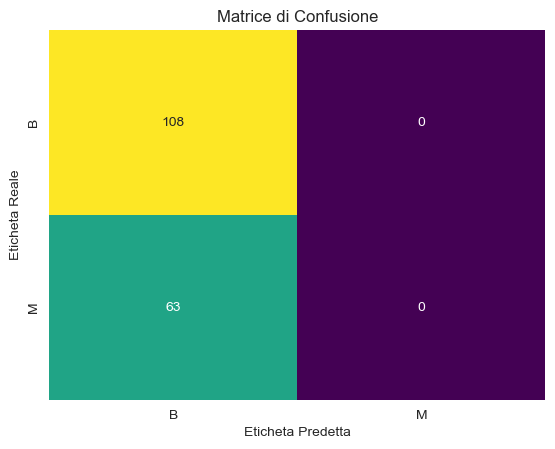

In [181]:
bnb.fit(X_train,Y_train) #training modello
y_pred3 = bnb.predict(X_test) #test modello
accuracyBNB = accuracy_score(Y_test,y_pred3)
precisionBNB = precision_score(Y_test,y_pred3,zero_division=1)
recallBNB = recall_score(Y_test,y_pred3)

print('Accuracy: ' ,accuracyBNB)
print('Precision: ' ,precisionBNB)
print('Recall: ' ,recallBNB)

#plot della matrice di confusione
labels=['B', 'M']
confusion_matrix_result = confusion_matrix(Y_test,y_pred3)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels, cbar=False)
plt.title('Matrice di Confusione')
plt.xlabel('Eticheta Predetta')
plt.ylabel('Eticheta Reale')
plt.show()

vediamo come si comporta l'algoritmo

  Variante  Precisione    Recall  Accuratezza
0      BNB    1.000000  0.000000     0.631579
1      GNB    0.919355  0.904762     0.935673
2      MNB    0.972973  0.571429     0.836257


(0.0, 1.0, 0.0, 1.0)

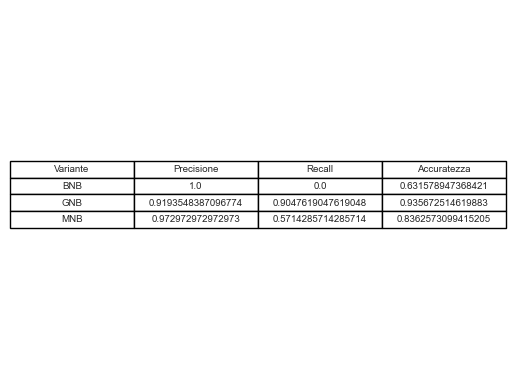

In [182]:
#tabella delle metriche di valutazione ottenute, per ogni distribuzione

data = {
    'Variante': ['BNB', 'GNB', 'MNB'],
    'Precisione': [precisionBNB, precisionGNB, precisionMNB],
    'Recall': [recallBNB, recallGNB, recallMNB],
    'Accuratezza': [accuracyBNB, accuracyGNB, accuracyMNB],
}

# Creazione del DataFrame
df = pd.DataFrame(data)

# Stampa del DataFrame
print(df)

# Creazione della tabella con matplotlib
plt.table(cellText=df.values,
          colLabels=df.columns,
          cellLoc='center',
          loc='center')
plt.axis('off')  # Rimuovi gli assi

Usiamo alberi decisionali spiga un po..

In [183]:
from sklearn.tree import DecisionTreeClassifier
# NOTA da descrivere la scelta della profondità 
dtc = DecisionTreeClassifier(max_depth=3)

Accuracy:  0.9590643274853801
Precision:  0.9516129032258065
Recall:  0.9365079365079365


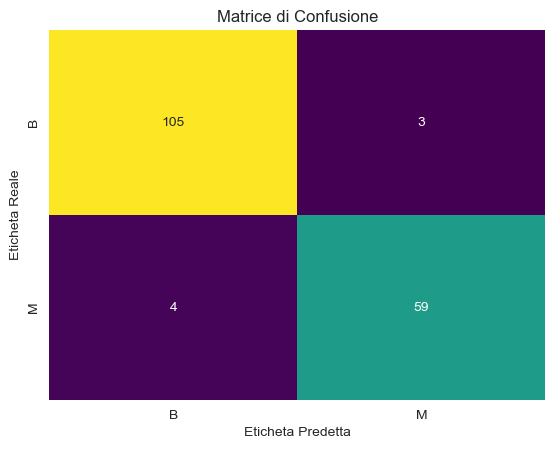

In [184]:
dtc.fit(X_train,Y_train)
y_pred = dtc.predict(X_test)
accuracyDTC = accuracy_score(Y_test,y_pred)
precisionDTC = precision_score(Y_test,y_pred)
recallDTC = recall_score(Y_test,y_pred)

print('Accuracy: ' ,accuracyDTC)
print('Precision: ' ,precisionDTC)
print('Recall: ' ,recallDTC)

#plot della matrice di confusione
labels=['B', 'M']
confusion_matrix_result = confusion_matrix(Y_test,y_pred)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels, cbar=False)
plt.title('Matrice di Confusione')
plt.xlabel('Eticheta Predetta')
plt.ylabel('Eticheta Reale')
plt.show()

in generale ho ottenuto i seguenti risultati

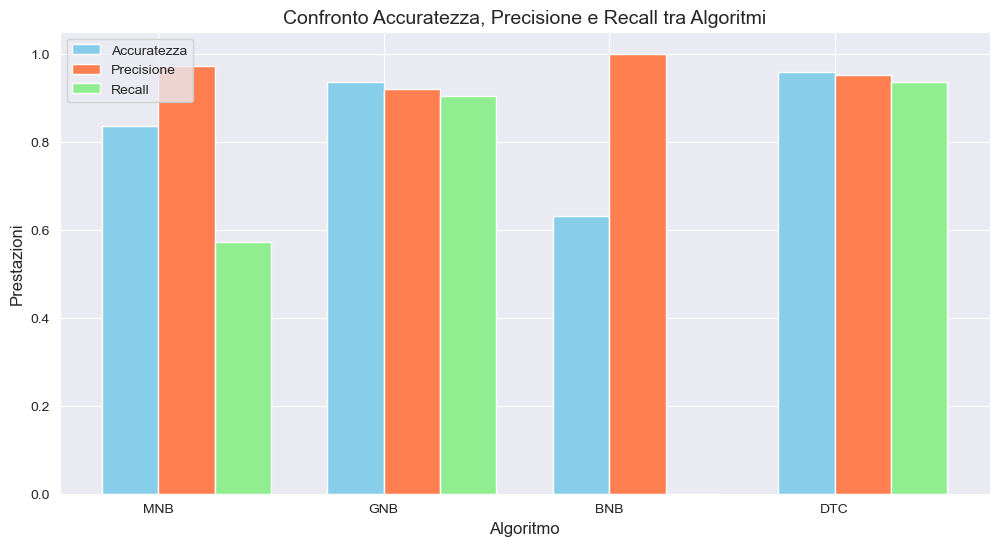

In [185]:
algorithms = ['MNB', 'GNB', 'BNB', 'DTC']

# Risultati delle prestazioni
accuracy_results = [accuracyMNB, accuracyGNB, accuracyBNB, accuracyDTC]
precision_results = [precisionMNB, precisionGNB, precisionBNB, precisionDTC]
recall_results = [recallMNB, recallGNB, recallBNB, recallDTC]

# Larghezza delle barre
bar_width = 0.25

# Posizioni delle barre
index = np.arange(len(algorithms))

# Creo un grafico a barre doppie
plt.figure(figsize=(12, 6))
bar1 = plt.bar(index, accuracy_results, bar_width, label='Accuratezza', color='skyblue')
bar2 = plt.bar(index + bar_width, precision_results, bar_width, label='Precisione', color='coral')
bar3 = plt.bar(index + 2 * bar_width, recall_results, bar_width, label='Recall', color='lightgreen')

# Personalizzo il grafico con i nomi delle label e dimensione font
plt.xlabel('Algoritmo', fontsize=12)
plt.ylabel('Prestazioni', fontsize=12)
plt.title('Confronto Accuratezza, Precisione e Recall tra Algoritmi', fontsize=14)
plt.xticks(index + bar_width / 2, algorithms)
plt.legend()

#eseguo
plt.show()

Con il Decision Tree ho ottenuto prestazioni più bilanciate e in media tra le varie metriche superiori.

  Variante  Precisione    Recall  Accuratezza
0      GNB    0.919355  0.904762     0.935673
1      DTC    0.951613  0.936508     0.959064


(0.0, 1.0, 0.0, 1.0)

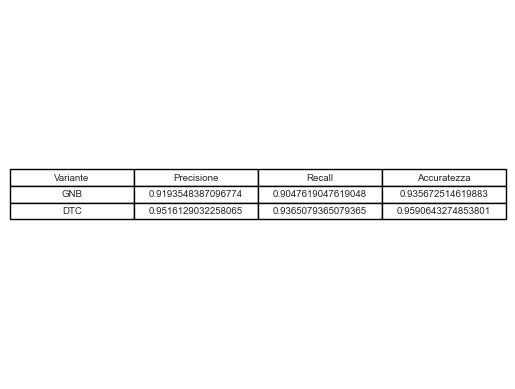

In [186]:
#GNB vs DTC

data = {
    'Variante': ['GNB', 'DTC'],
    'Precisione': [precisionGNB, precisionDTC],
    'Recall': [recallGNB, recallDTC],
    'Accuratezza': [ accuracyGNB, accuracyDTC],
}

# Creazione del DataFrame
df = pd.DataFrame(data)

# Stampa del DataFrame
print(df)

# Creazione della tabella con matplotlib
plt.table(cellText=df.values,
          colLabels=df.columns,
          cellLoc='center',
          loc='center')
plt.axis('off')  # Rimuovi gli assi

stampo la curva ROC e poi spieghi un po //da controllare

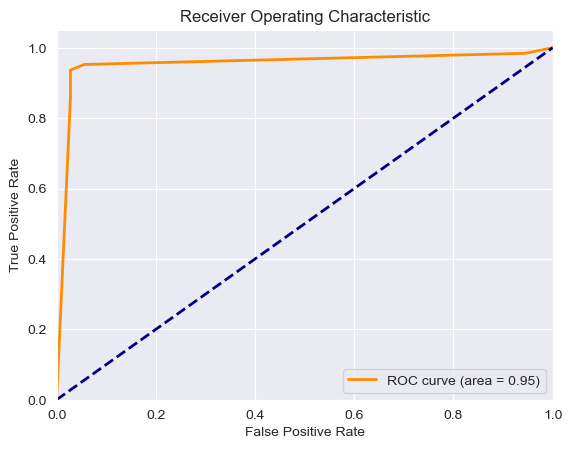

In [187]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(Y_test, dtc.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

spiegazione

## 